In [49]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys
import os
from os import error
from sys import maxsize

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


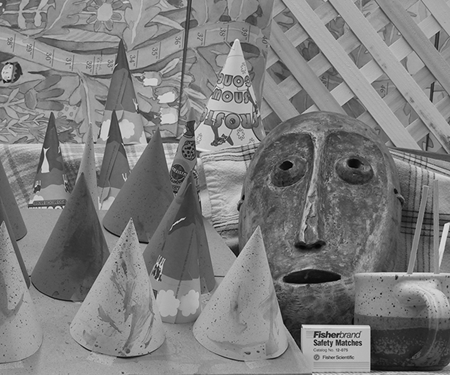

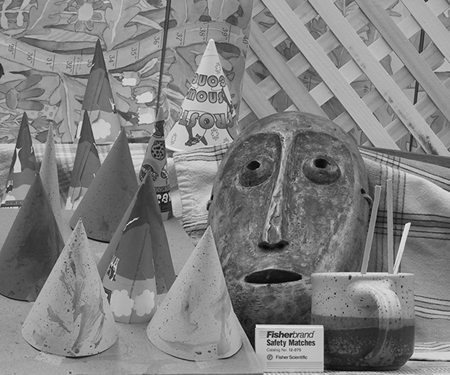

In [10]:
img1=cv.imread('/content/drive/MyDrive/l2.png', cv.IMREAD_GRAYSCALE)
img2=cv.imread('/content/drive/MyDrive/r2.png', cv.IMREAD_GRAYSCALE)
cv2_imshow(img1)
cv2_imshow(img2)


In [58]:

def block_matching(img1,img2,window_size,met):
   rows = img2.shape[0]
   cols = img2.shape[1]
   output = np.zeros((rows,cols))
   disp = np.zeros((rows,cols))
   w_half = window_size // 2
   for i in range(w_half,rows-w_half):
     for j in range(w_half,cols-w_half):
       window = img1[i-w_half:i+w_half+1,j-w_half:j+w_half+1]
       minValue=sys.maxsize
       index=-1
       for k in range(w_half,cols-w_half):
         secWin= img2[i-w_half:i+w_half+1,k-w_half:k+w_half+1]
         if(met == "SAD"):
           err=np.sum(np.abs(np.subtract(window,secWin)))
         else:
           err=np.sum((np.subtract(window,secWin))**2)  
         if(err < minValue):
           minValue =err
           index = k

       disp[i][j]=(j-index)
   return  disp    

  

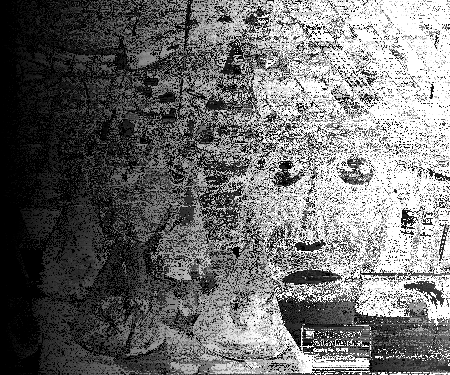

In [53]:
output  = block_matching(img1,img2,1,"SAD")

cv2_imshow(output)



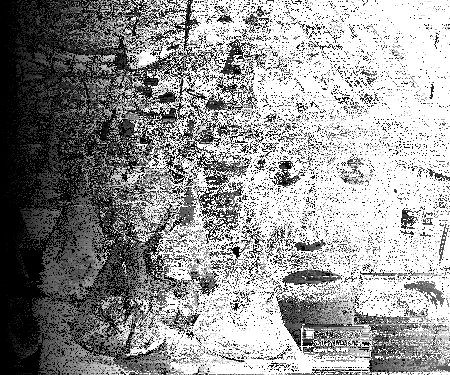

In [72]:
#multiply by a scalar for better visualization
cv2_imshow(output*2)

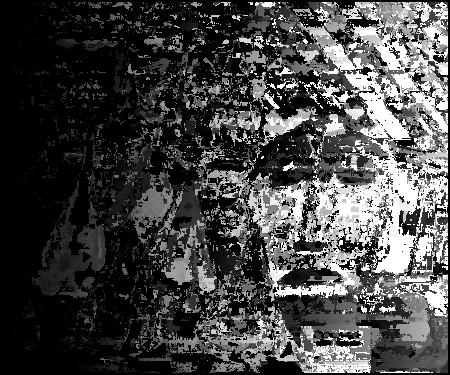

In [54]:
output5  = block_matching(img1,img2,5,"SAD")

cv2_imshow(output5)

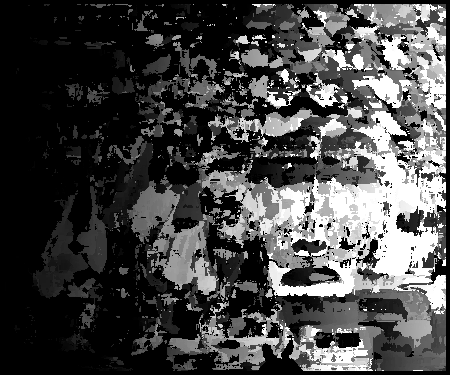

In [55]:
output9  = block_matching(img1,img2,9,"SAD")

cv2_imshow(output9)

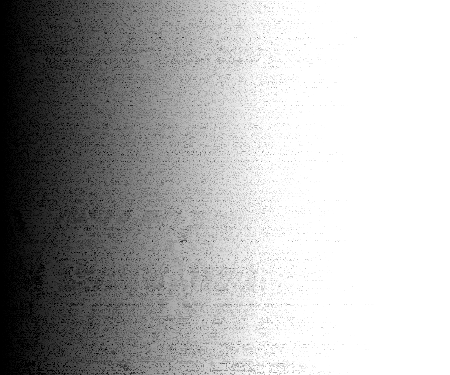

In [59]:
outputSSD1=block_matching(img1,img2,1,"SSD")
cv2_imshow(outputSSD1)

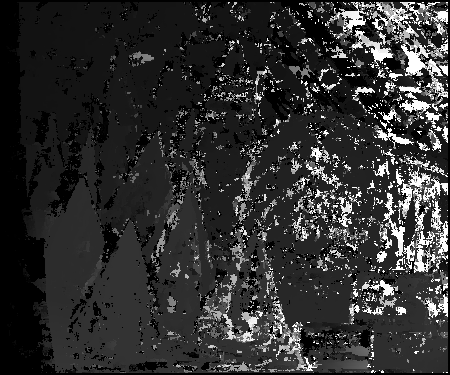

In [60]:
outputSSD5=block_matching(img1,img2,5,"SSD")
cv2_imshow(outputSSD5)

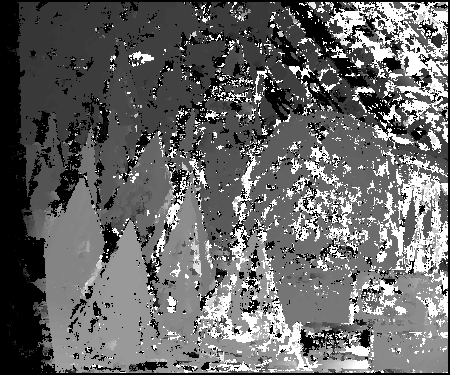

In [67]:
#multiply SSD5 by a scalar for better visualization
cv2_imshow(outputSSD5*3)

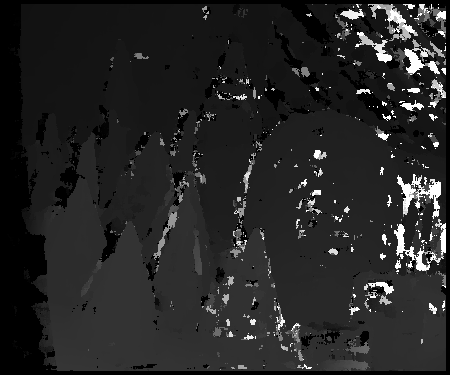

In [61]:
outputSSD9=block_matching(img1,img2,9,"SSD")
cv2_imshow(outputSSD9)

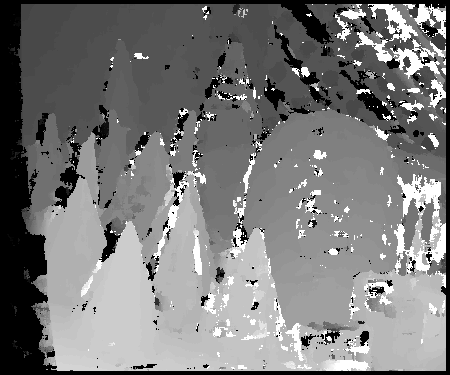

In [70]:
##multiply SSD5 by a scalar for better visualization
cv2_imshow(outputSSD9*4)